## **Guilherme Morone Araujo - gma2**

# Aplicação do Método dos Momentos para determinar a distribuição superficial de carga nas placas abaixo

![placas](picture.jpg)

In [162]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import math

In [163]:
# Variáveis iniciais

Vi = 0          # Potencial da placa em z = 0
V0 = 1          # Potencial da placa em z = d
L = 0.1         # Lado = 10 cm
d = 0.001       # distancia entre as placas condutoras = 1 mm
e0 = 8.85e-12   # Permissividade no vácuo
N = 10          # Número de segmentos
delta = L/N     # Tamanho do lado de cada elemento 
                # Cada lado é divido em N segmentos, totalizando N² elementos
                
# Vale ressaltar que o trabalho será realizado para valores diferentes de N
# e não apenas para o que foi inicializado aqui

In [164]:
# Matriz para as coordenadas do centro de cada elemento (x, y, z)
# A matriz vai ter 2 * N² elementos (duas placas condutoras)

def coordenadasCentro(nElementos):
    R = []
    
    for k in range(2):
        for i in range(nElementos):
            for j in range(nElementos):
                R.append([(j * delta) + (delta/2), (i * delta) + (delta/2), k * d])
    
    return R

# Printando a matriz para o caso inicializado (N == 10)
R10 = coordenadasCentro(N)
for i in range(2 * N**2):
    for j in range(3):
        print(round(R10[i][j], 3), end = ' ') # Arredondamento apenas para facilitar a visualização
    print()

0.005 0.005 0.0 
0.015 0.005 0.0 
0.025 0.005 0.0 
0.035 0.005 0.0 
0.045 0.005 0.0 
0.055 0.005 0.0 
0.065 0.005 0.0 
0.075 0.005 0.0 
0.085 0.005 0.0 
0.095 0.005 0.0 
0.005 0.015 0.0 
0.015 0.015 0.0 
0.025 0.015 0.0 
0.035 0.015 0.0 
0.045 0.015 0.0 
0.055 0.015 0.0 
0.065 0.015 0.0 
0.075 0.015 0.0 
0.085 0.015 0.0 
0.095 0.015 0.0 
0.005 0.025 0.0 
0.015 0.025 0.0 
0.025 0.025 0.0 
0.035 0.025 0.0 
0.045 0.025 0.0 
0.055 0.025 0.0 
0.065 0.025 0.0 
0.075 0.025 0.0 
0.085 0.025 0.0 
0.095 0.025 0.0 
0.005 0.035 0.0 
0.015 0.035 0.0 
0.025 0.035 0.0 
0.035 0.035 0.0 
0.045 0.035 0.0 
0.055 0.035 0.0 
0.065 0.035 0.0 
0.075 0.035 0.0 
0.085 0.035 0.0 
0.095 0.035 0.0 
0.005 0.045 0.0 
0.015 0.045 0.0 
0.025 0.045 0.0 
0.035 0.045 0.0 
0.045 0.045 0.0 
0.055 0.045 0.0 
0.065 0.045 0.0 
0.075 0.045 0.0 
0.085 0.045 0.0 
0.095 0.045 0.0 
0.005 0.055 0.0 
0.015 0.055 0.0 
0.025 0.055 0.0 
0.035 0.055 0.0 
0.045 0.055 0.0 
0.055 0.055 0.0 
0.065 0.055 0.0 
0.075 0.055 0.0 
0.085 0.055 0.

# Primeira questão

In [165]:
# Matriz de impedância

def impendancia(m, n, R):
    if m != n:
        # 1/(4 * pi * e0) * delta²/sqrt[(xp - xi)² + (yq - yj)² + (zs - zk)²]
        return 1/(4 * math.pi * e0) * (delta**2)/math.sqrt(((R[m][0] - R[n][0])**2) + ((R[m][1] - R[n][1])**2) + ((R[m][2] - R[n][2])**2))
    
    # [delta/(pi * e0)] * ln(1 + sqrt(2))
    return delta/(math.pi * e0) * math.log(1 + math.sqrt(2))
    
def matrizImpedancia(nElementos, R):
    Z = []
    
    for i in range(2 * nElementos**2):
        Z.append([])
        for j in range(2 * nElementos**2):
            Z[i].append(impendancia(i, j, R))
      
    return Z

# Matriz de impedância para o caso inicializado (N == 10)          
Z10 = matrizImpedancia(N, R10)
  
# Printando a matriz
#for i in range(2 * N**2):
#    for j in range(2 * N**2):
#        print(Z10[i][j], end = ' ')
#    print()

In [166]:
# Matriz de tensão (potencial)

def matrizTensao(nElementos):
    V = []

    for i in range(nElementos**2): # Placa condutora em z = 0
        V.append(Vi)
        
    for i in range(nElementos**2, 2 * nElementos**2): # Placa condutora em z = d
        V.append(V0)
        
    return V

# Matriz de tensão para o caso inicializado (N == 10)
V10 = matrizTensao(N)
 
# Printando a matriz
for i in range(2 * N**2):
    print(V10[i], end = ' ')


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

# Segunda questão

In [167]:
def amplitude(imp, volt):
    # Resolvendo o sistema para determinar as amplitudes dos pulsos
    return np.linalg.solve(imp, volt)
    # Cada elemento de A terá uma solução para cada parte dividida da placa condutora (que está em R)

# Amplitude dos pulsos para o caso inicializado (N == 10)
A10 = amplitude(Z10, V10)
print(A10)

[ 1.02534930e-09  9.91166288e-10  9.79841212e-10  9.74599244e-10
  9.72405235e-10  9.72405235e-10  9.74599244e-10  9.79841212e-10
  9.91166288e-10  1.02534930e-09  9.91166288e-10  9.54532313e-10
  9.43401100e-10  9.38638980e-10  9.36725983e-10  9.36725983e-10
  9.38638980e-10  9.43401100e-10  9.54532313e-10  9.91166288e-10
  9.79841212e-10  9.43401100e-10  9.32020495e-10  9.27177424e-10
  9.25251499e-10  9.25251499e-10  9.27177424e-10  9.32020495e-10
  9.43401100e-10  9.79841212e-10  9.74599244e-10  9.38638980e-10
  9.27177424e-10  9.22257513e-10  9.20297896e-10  9.20297896e-10
  9.22257513e-10  9.27177424e-10  9.38638980e-10  9.74599244e-10
  9.72405235e-10  9.36725983e-10  9.25251499e-10  9.20297896e-10
  9.18320037e-10  9.18320037e-10  9.20297896e-10  9.25251499e-10
  9.36725983e-10  9.72405235e-10  9.72405235e-10  9.36725983e-10
  9.25251499e-10  9.20297896e-10  9.18320037e-10  9.18320037e-10
  9.20297896e-10  9.25251499e-10  9.36725983e-10  9.72405235e-10
  9.74599244e-10  9.38638

In [168]:
def distSuperf(amp):
    # A distribuição superficial de carga pode ser aproximada por uma soma dos elementos do vetor A
    distribuicaoSuperficial = sum(amp)
    print("ρ =", distribuicaoSuperficial) # rho
    return distribuicaoSuperficial

# Distribuição superficial de carga para o caso inicializado (N == 10)
rho10 = distSuperf(A10)

ρ = 1.7538176039518793e-08


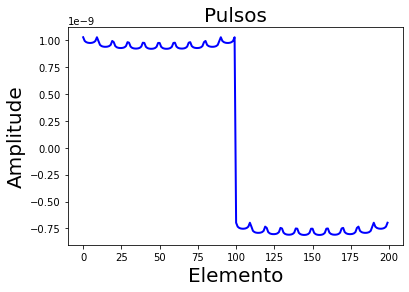

In [169]:
# Resultado, gráfico da amplitude dos pulsos

def ampChart(amp):
    plt.title('Pulsos', fontsize=20)
    plt.xlabel('Elemento', fontsize=20) # Elemento = parte da placa dividida pelo segmento (N)
    plt.ylabel('Amplitude', fontsize=20) # Valor esperado
    plt.plot(amp, color='blue', linewidth='2')
    plt.show()

# Gráfico plotado para o caso inicializado (N == 10)
ampChart(A10)

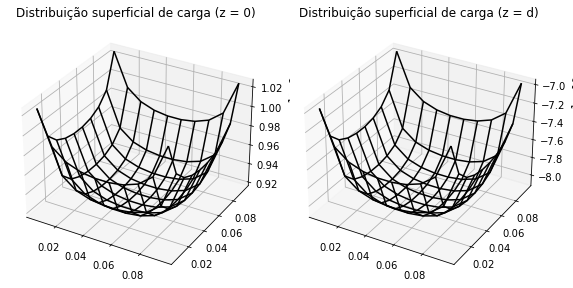

In [170]:
# Gráfico 3D (distribuição de carga)

def ampChart3D(centros, amp, nElementos, texto = 'Distribuição superficial de carga'):
    newR = np.array(centros)
    
    # Gráfico para z = 0
    # Primeira metade dos arrays
    X = newR[:len(newR)//2, 0]
    Y = newR[:len(newR)//2, 1]
    Z = np.array(amp[:len(amp)//2])

    shapedX = np.reshape(X, (nElementos, nElementos))
    shapedY = np.reshape(Y, (nElementos, nElementos))
    shapedZ = np.reshape(Z, (nElementos, nElementos))

    figr = plt.figure(figsize=plt.figaspect(0.5))
    ax = figr.add_subplot(1, 2, 1, projection='3d')
    ax.plot_wireframe(shapedX, shapedY, shapedZ, color='black')
    ax.set_title(texto + ' (z = 0)')
    
    # Gráfico para z = d
    # A outra metade dos arrays
    Xd = newR[len(newR)//2:len(newR), 0]
    Yd = newR[len(newR)//2:len(newR), 1]
    Zd = np.array(amp[len(amp)//2:len(amp)])

    shapedXd = np.reshape(Xd, (nElementos, nElementos))
    shapedYd = np.reshape(Yd, (nElementos, nElementos))
    shapedZd = np.reshape(Zd, (nElementos, nElementos))

    ax = figr.add_subplot(1, 2, 2, projection='3d')
    ax.plot_wireframe(shapedXd, shapedYd, shapedZd, color='black')
    ax.set_title(texto + ' (z = d)')
    
    figr.tight_layout()
    plt.show()
    
# Gráfico 3D plotado para o caso inicializado (N == 10)
ampChart3D(R10, A10, N) 

# Terceira questão
## Com o aumento do número de segmentos (N), a carga tende a se concentrar na borda da placa

Para N = 5


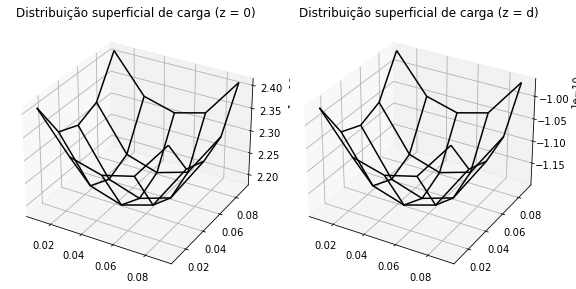

Para N = 10


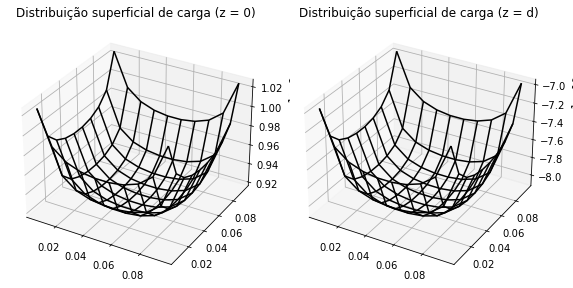

Para N = 15


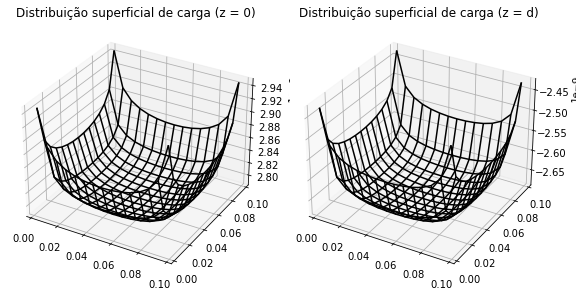

Para N = 20


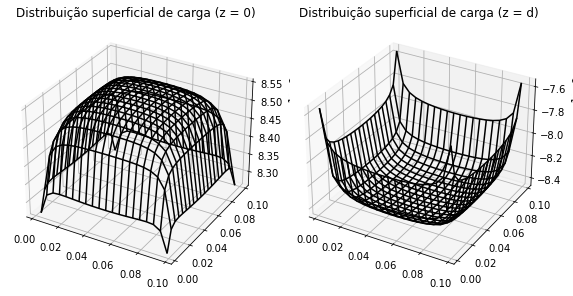

Para N = 25


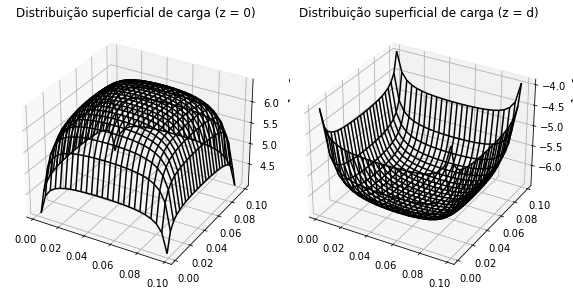

Para N = 30


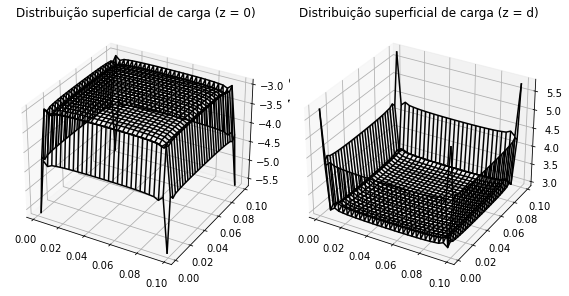

Para N = 50


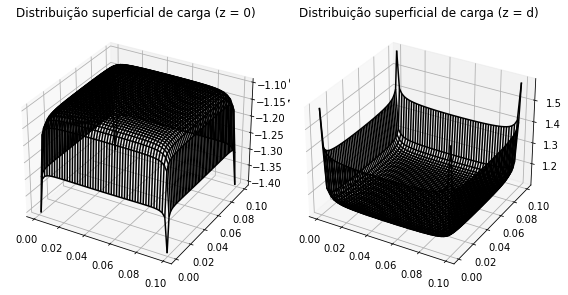

In [171]:
# Teste para vários N
listaN = [5, 10, 15, 20, 25, 30, 50]
for k in listaN:
    delta = L/k
    Rk = coordenadasCentro(k)
    Zk = matrizImpedancia(k, Rk)
    Vk = matrizTensao(k)
    Ak = amplitude(Zk, Vk)
    print('Para N =', k)
    ampChart3D(Rk, Ak, k)